In [32]:
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
sns.set(style="darkgrid")
# indicate the output of plotting function is printed to the notebook
%matplotlib inline 

In [33]:
df  = pd.read_csv('qqq_weekly_thursday_ranked.csv')
df = df.dropna()
df


,dt,day_of_week,adj_close,ticker,ret,next_ret,pct_rank,pos
2,2000-05-25,4,2.6980,AAPL,-0.133785,0.021201,0.000000,1
3,2000-05-25,4,94.4006,SPY,-0.038579,0.054183,0.333333,0
6,2000-06-01,4,2.7552,AAPL,0.021201,0.063843,0.000000,1
7,2000-06-01,4,20.6994,MSFT,0.049756,0.065828,0.333333,0
8,2000-06-01,4,99.5155,SPY,0.054183,0.010967,0.666667,0
...,...,...,...,...,...,...,...,...
93287,2020-06-11,4,335.9000,AAPL,0.042132,0.047127,0.961905,-1
93288,2020-06-11,4,122.4200,EA,0.044718,0.056608,0.971429,-1
93289,2020-06-11,4,134.9200,TTWO,0.057450,0.046917,0.980952,-1
93290,2020-06-11,4,972.8400,TSLA,0.125477,0.031989,0.990476,-1


In [34]:
df['allocation'] = abs(df['pos'])
df['pnl'] = df['pos'] * df['next_ret']
print ( df)

dt  day_of_week  adj_close ticker       ret  next_ret  \
2      2000-05-25            4     2.6980   AAPL -0.133785  0.021201   
3      2000-05-25            4    94.4006    SPY -0.038579  0.054183   
6      2000-06-01            4     2.7552   AAPL  0.021201  0.063843   
7      2000-06-01            4    20.6994   MSFT  0.049756  0.065828   
8      2000-06-01            4    99.5155    SPY  0.054183  0.010967   
...           ...          ...        ...    ...       ...       ...   
93287  2020-06-11            4   335.9000   AAPL  0.042132  0.047127   
93288  2020-06-11            4   122.4200     EA  0.044718  0.056608   
93289  2020-06-11            4   134.9200   TTWO  0.057450  0.046917   
93290  2020-06-11            4   972.8400   TSLA  0.125477  0.031989   
93291  2020-06-11            4    40.7900    VIX  0.580395 -0.192449   

       pct_rank  pos  allocation       pnl  
2      0.000000    1           1  0.021201  
3      0.333333    0           0  0.000000  
6      0.000000

In [35]:
pnl = df.groupby('dt')['pnl'].sum()
total_allocations = df.groupby('dt')['allocation'].sum()
allocated_pnl = pnl / total_allocations
cum_pnl = allocated_pnl.cumsum()
pnl_df = pd.concat([allocated_pnl, cum_pnl], axis=1)
pnl_df.columns = ['pnl', 'cum_pnl']
pnl_df

,pnl,cum_pnl
dt,,
2000-05-25,0.021201,0.021201
2000-06-01,0.015085,0.036286
2000-06-08,-0.021613,0.014673
2000-06-15,-0.098352,-0.083679
2000-06-22,-0.051475,-0.135154
...,...,...
2020-05-14,0.023833,3.316403
2020-05-21,-0.015377,3.301026
2020-05-28,-0.040159,3.260866


In [37]:
dates = pd.to_datetime(pnl_df.index)
plot()

DatetimeIndex(['2000-05-25', '2000-06-01', '2000-06-08', '2000-06-15',
               '2000-06-22', '2000-06-29', '2000-07-06', '2000-07-13',
               '2000-07-20', '2000-07-27',
               ...
               '2020-04-09', '2020-04-16', '2020-04-23', '2020-04-30',
               '2020-05-07', '2020-05-14', '2020-05-21', '2020-05-28',
               '2020-06-04', '2020-06-11'],
              dtype='datetime64[ns]', name='dt', length=1017, freq=None)

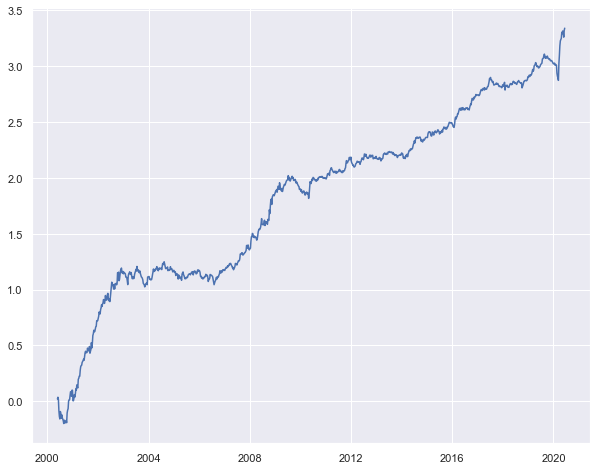

In [45]:
plt.figure(figsize=(10,8))
plt.plot(dates, pnl_df['cum_pnl'])
plt.show()